# Lane Detection notebook
## testing and improvment stage

In [50]:
!git clone https://github.com/udacity/CarND-LaneLines-P1

fatal: destination path 'CarND-LaneLines-P1' already exists and is not an empty directory.


In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [65]:
frame = cv2.imread("CarND-LaneLines-P1\\test_images\\whiteCarLaneSwitch.jpg")

# Check if the image was loaded successfully
if frame is  None:
    print("Failed to load the image.")


In [66]:
def region(image):
    height, width = image.shape[0], image.shape[1]
    triangle = np.array([
                       [(100, height), (475, 255), (width, height)]
                       ])
    
    mask = np.zeros_like(image)
    
    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

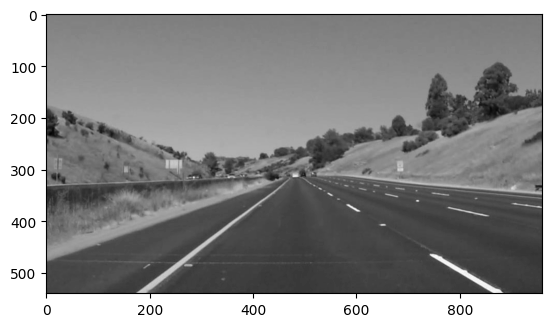

In [67]:
# Convert the image to grayscale
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(frame, cmap='gray')
plt.show()

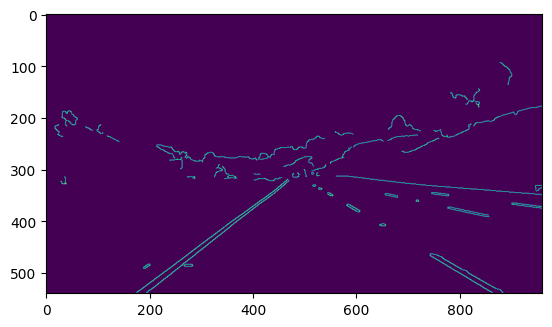

In [68]:
frame = cv2.GaussianBlur(frame, (5, 5), 0)
edges = cv2.Canny(frame, 100, 200)
plt.imshow(edges)

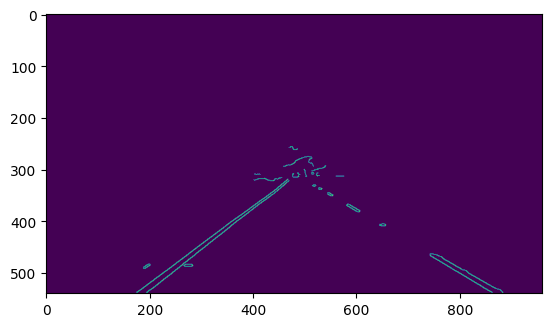

In [69]:
edges = region(edges)
plt.imshow(edges)

In [70]:
lines = cv2.HoughLinesP(edges, rho=2, theta=np.pi/180, threshold=100, minLineLength=40, maxLineGap=5)

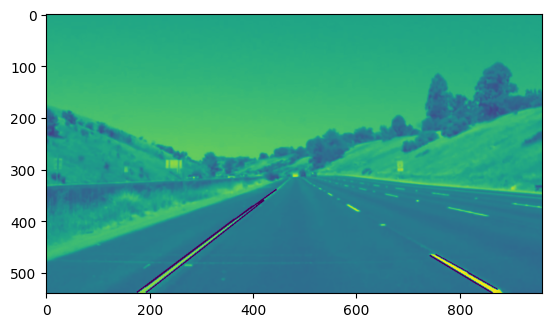

In [71]:
def display_lines(image, lines):
    lines_image = np.copy(image)  # Create a copy of the original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]  # Extract line coordinates
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw the line in red (0, 0, 255)

    return lines_image

result_image = display_lines(frame, lines)
plt.imshow(result_image)
plt.show()